### Predicting Future Data

After training this model on the already seen data, we can place it into production to predict future amounts of customers. Because we in a perfectly constructed world  our target variables of customers all follow the formula, $customers =  3*temp + 10 $, our model predicts the new number of customers perfectly as well.

In [13]:
new_random_temperatures = list(map(lambda num: randint(30,101), range(0, 50)))
new_perfect_customers = list(map(lambda temp: 3*temp + 10, new_random_temperatures))
new_random_temperatures[0:3]

[94, 54, 68]

In [14]:
input_new_temperatures = list(map(lambda temp: [temp], new_random_temperatures))
input_new_temperatures[0:3]

[[94], [54], [68]]

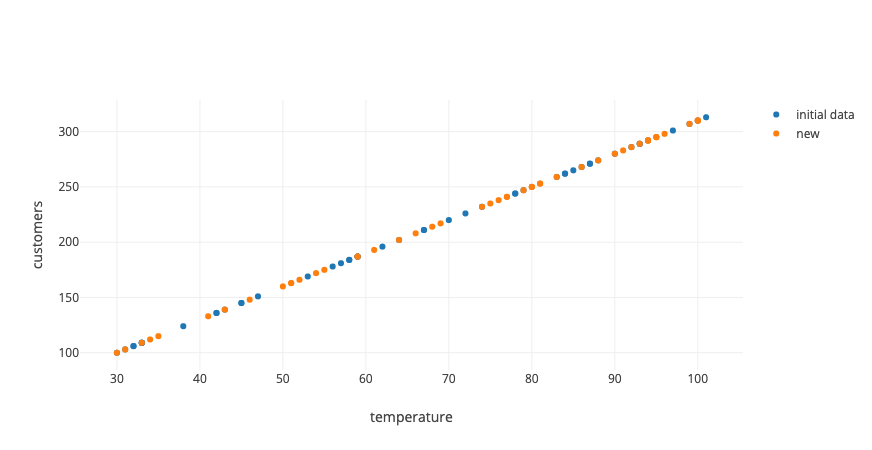

In [15]:
from graph import trace_values, plot
new_data_trace = trace_values(new_random_temperatures, new_perfect_customers, name = 'new')
plot([data_trace, new_data_trace], layout = layout)

In [16]:
perfect_model.score(input_new_temperatures, new_perfect_customers)

1.0

### Summary

In this lesson, we saw how to generate a dataset that perfectly matches an underlying linear model.  We simply create a random set of data, and set the outcomes such that they are generated from a linear equation, here $customers = 3xtemperature + 10$.  We saw that when our data perfectly matches a linear formula, our linear regression model discovers that underlying formula and perfectly predicts the outcomes.  We saw that it trains on this data, perfectly predicts the outcome, and then when the model is placed into production, because our data continues to adhere to this formula, it predicts future data as well.

### Creating data with errors in it

Of course when we gather  

Now that we have initialized our model with the code `linear_regression = LinearRegression()`, it is now time to pass through some data into this model so what we can fit the model.  In the last lesson, we saw how we can fit the model by choosing parameters that minimize the error of our function.

Here we do the same thing, and we do so by passing the data into our model, so that the linear regression model can then adjust the parameters to fit to this data.

In [421]:
from random import randint
random.seed(1)
random_temperatures = list(map(lambda num: randint(30,101), range(0, 50)))

In [422]:

len(random_temperatures)
min(random_temperatures)
# 2
max(random_temperatures)
# 101

101

Now let's create some fake data according to the formula $y = 3*temperature + 10 + error $.

In [423]:
customers = list(map(lambda temp: 3*temp + 10, random_temperatures))

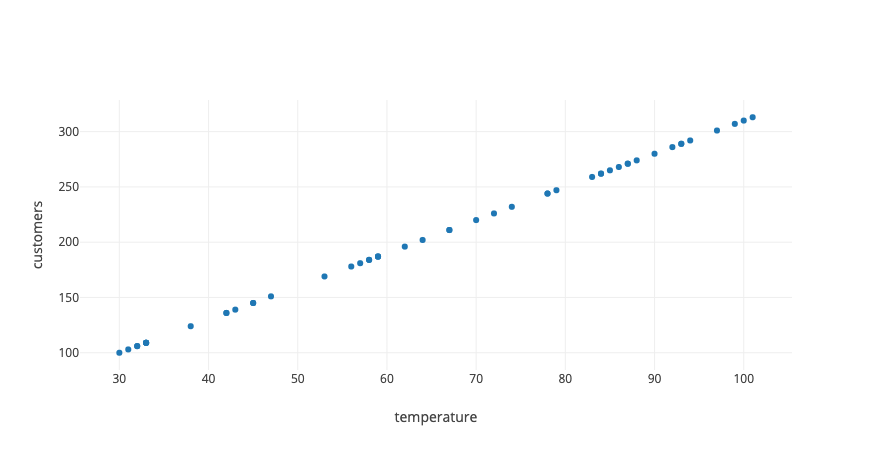

In [424]:
from graph import trace_values, plot
data_trace = trace_values(random_temperatures, customers, name = 'actual')


layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([data_trace], layout = layout)

In [439]:
from sklearn.linear_model import LinearRegression
true_model = LinearRegression()
inputs = list(map(lambda temperature: [temperature], random_temperatures))
true_model.fit(inputs, customers)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [440]:
true_model.coef_

array([3.])

This data is too perfect for us, so let's add some noise to this.

We have two hundred datapoints, so let's generate a list of two hundred random numbers to add to each of our data points.  Our numbers will be between -70 and positive 70.

In [425]:
random_errors = list(map(lambda num: randint(-50,50), range(0, 50)))
paired_temps_and_errors = list(zip(random_errors, customers))
noisy_customers = list(map(lambda pair: sum(pair), paired_temps_and_errors))


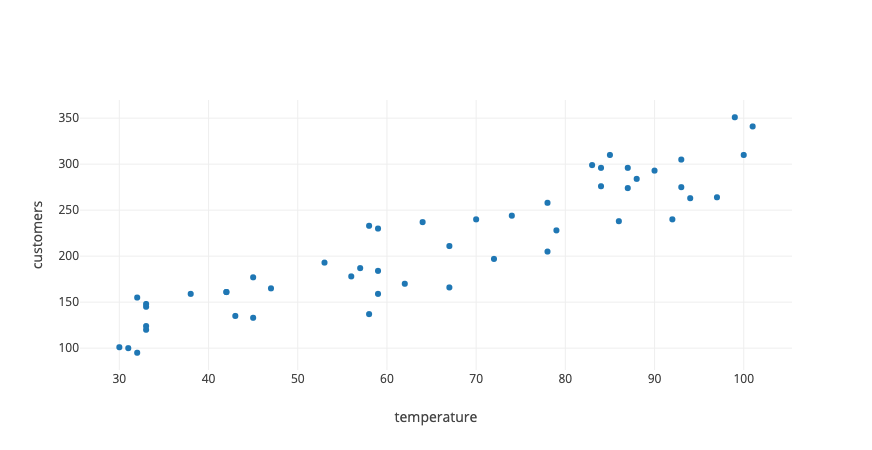

In [426]:
from graph import trace_values, plot
data_trace = trace_values(random_temperatures, noisy_customers, name = 'actual')


layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([data_trace], layout = layout)

For noise there's nothing we can do about it.  We just simply have to notice that the more noise the, the less accurate our model.  Noise is random so our linear model cannot predict it.

And let's fit a linear regression model to this data.

In [427]:
inputs = list(map(lambda temperature: [temperature], random_temperatures))

In [428]:
from sklearn.linear_model import LinearRegression

In [429]:
regression_model = LinearRegression()

In [430]:
regression_model.fit(inputs,noisy_customers)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [431]:
regression_model.coef_

array([2.76427563])

In [432]:
regression_model.intercept_

32.12580309856557

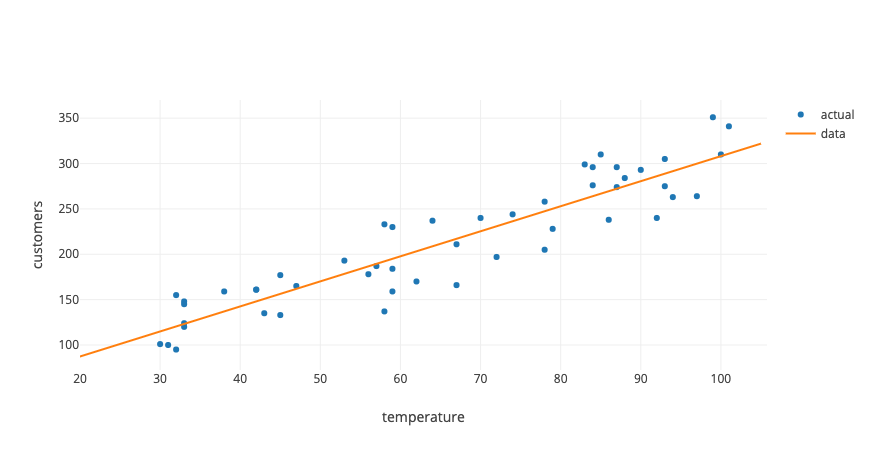

In [433]:
temperature_range = list(range(20, 110, 5))
predicted_values = list(map(lambda temp: 2.76*temp + 32.125, temperature_range)) 
model_trace = trace_values(temperature_range, predicted_values, mode = 'lines')
plot([data_trace, model_trace], layout = layout)

Now one thing to note here is that when we look at the parameters of the fitted regression model, it generated a model of the following.

$$ customers =2.76∗temperature+32.125 $$

Now this is different than the model would look if it really detected the underlying relationship between customers and temperature.  As we set the data so that the real relationship is: 

$$ customers =3∗temperature+10 $$

Instead, our model was picking up on the noise in the generated data.  And we can see that our model did do a really good job of modeling the particulars of the data it saw.  In fact, if we look at the score for the data, we get the following:

In [434]:
regression_model.score(inputs,noisy_customers)

0.8439783993121167

### Putting the data in production

The restaurant determines that this score looks good to them, and so it places this model in production.  And now it uses this model to predict the number of customers going forward.

In [435]:
updated_random_temperatures = list(map(lambda num: randint(30,101), range(0, 40)))
updated_customers = list(map(lambda temp: 3*temp + 10, updated_random_temperatures))
random_errors = list(map(lambda num: randint(-50,50), range(0, 40)))
updated_paired_customers_and_errors = list(zip(random_errors, updated_customers))
updated_noisy_customers = list(map(lambda pair: sum(pair), updated_paired_customers_and_errors))


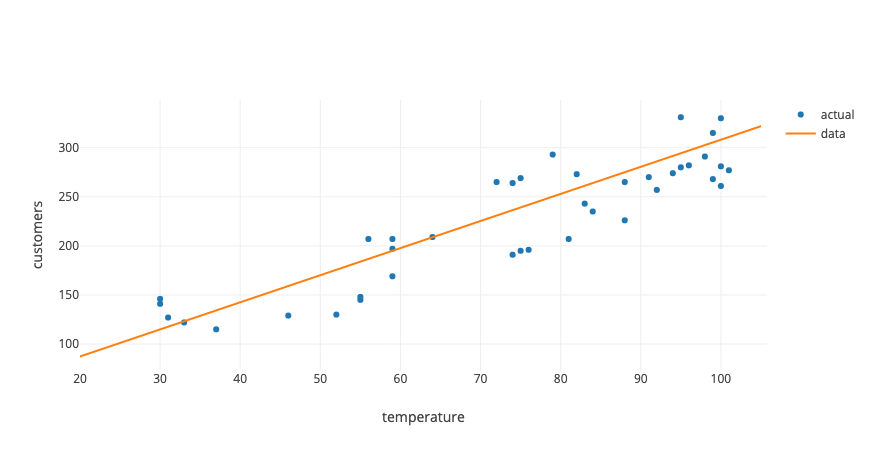

In [436]:
updated_data_trace = trace_values(updated_random_temperatures, updated_noisy_customers, name = 'actual')
plot([updated_data_trace, model_trace], layout = layout)

In [437]:
updated_inputs = list(map(lambda temperature: [temperature], updated_random_temperatures))

In [438]:
regression_model.score(updated_inputs,updated_noisy_customers)

0.7671242973775001

Now this score that we are getting on our updated inputs is worse than we received on our previous data.

But this problem highlights an important phenomenon called overfitting.  When we initially fit our model, our model could only look to the data it saw.  And that data had a lot of randomness in it, to never be seen again.  But because linear regression can draw a line through data, even if that  

### Time for an experiment

Our dataset consists of our temperatures and noisy customers.  Let's pair these datasets up.  This is our data going forward.

In [305]:
outputs_1 = list(map(lambda observation: observation[1], sample_1))
inputs_1 = list(map(lambda observation: [observation[0]], sample_1))

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
outputs_1 = list(map(lambda observation: observation[1], sample_1))
inputs_1 = list(map(lambda observation: [observation[0]], sample_1))

regression = LinearRegression()
regression.fit(inputs_1, outputs_1)
regression.score(inputs_1, outputs_1)

0.49538040327464183

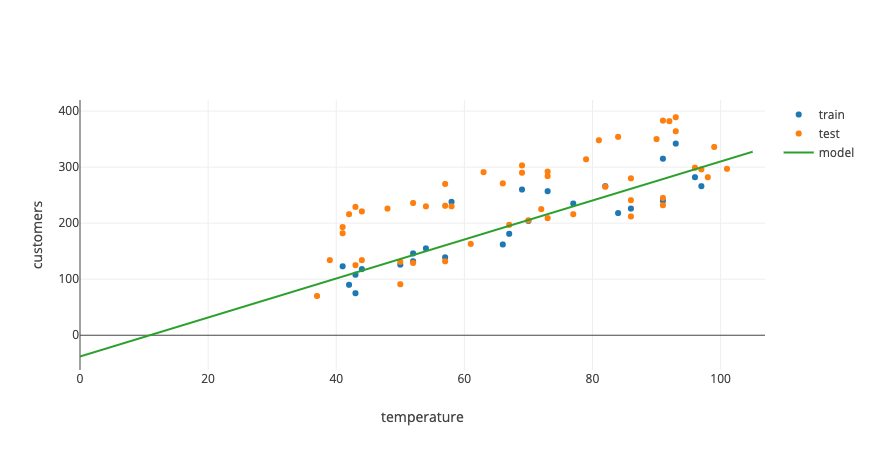

In [302]:
from graph import trace_values, plot
inputs_4_formatted = list(map(lambda observation: observation[0], sample_4))
inputs_4_test_formatted = list(map(lambda observation: observation[0], test_set_4))
data_trace_train = trace_values(inputs_4_formatted, outputs_4, name = 'train')
data_trace_test = trace_values(inputs_4_test_formatted, outputs_4_test, name = 'test')
input_temps = list(range(0, 110, 5))
predicted_values = list(map(lambda temp: temp*3.48 - 37.94, input_temps))
model_trace = trace_values(input_temps, predicted_values, name = 'model', mode = 'lines')

layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([data_trace_train, data_trace_test, model_trace], layout = layout)

In [270]:
regression_2 = LinearRegression()
regression_2.fit(inputs_4_test, outputs_4_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [271]:
regression_2.coef_

array([2.44753479])

In [272]:
regression_2.intercept_

40.69552286282317

In [277]:
predicted_values_test = list(map(lambda temp: temp*2.44 + 40.69, input_temps))

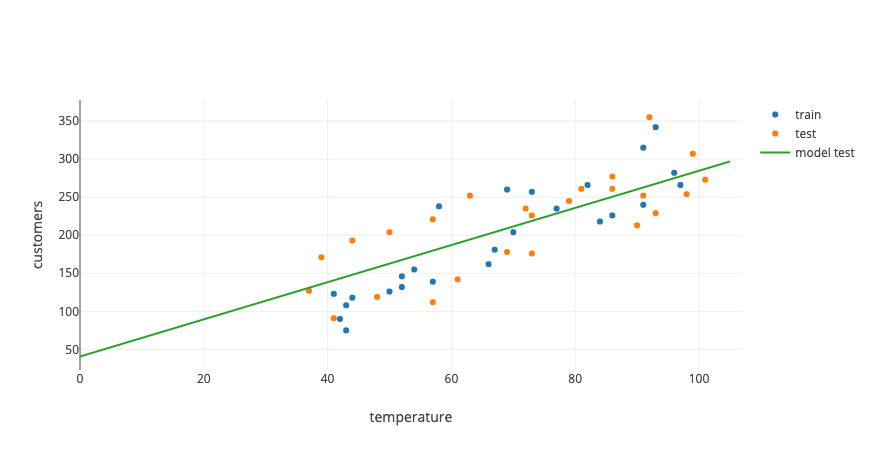

In [279]:
model_trace_test = trace_values(input_temps, predicted_values_test, name = 'model test', mode = 'lines')
plot([data_trace_train, data_trace_test, model_trace_test], layout = layout)

### Summary

In this lesson, we saw how to use the scikitlearn library to fit a machine learning model and make new predictions with our fitted model. 



We do so using similar steps to what we saw in our introduction to machine learning lesson.

1. Create an initial model
2. Fit the model to data
3. Use the fitted model to make new predictions

We can translate these steps into code with the following:

In [8]:
# import libraries
import sklearn
from sklearn.linear_model import LinearRegression

# 1. Create an initial model
linear_regression = LinearRegression()

# 2. Fit the model to data
linear_regression.fit(inputs, outputs)

# 3. Use the fitted model to make new predictions
linear_regression.predict(inputs)

The other thing to remember is that if we want to see the numbers behind these new predictions, we can see them by calling the corresponding methods.